In [4]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
import wave #for saving the audio file
%matplotlib inline

In [25]:
p = pyaudio.PyAudio() # instantiate PyAudio
chunck = 1024 # number of samples per frame

In [26]:
# open stream
stream = p.open(format=pyaudio.paInt16,channels=1, rate=10000, input=True, frames_per_buffer=chunck)

In [27]:
data2 = np.array([]) # to store the data
for i in range(1,50):
    a = stream.read(chunck) # read a chunck of data
    data = np.fromstring(a, dtype=np.int16) # convert data to numpy array
    data2 = np.append(data2, data) # append data to data2


#to stop the recording after the amount of time we calculated in our code
stream.stop_stream() # stop stream(Recording)
stream.close() # close stream
p.terminate() # close PyAudio

<ipython-input-27-62c255281272>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(a, dtype=np.int16) # convert data to numpy array


In [28]:
print(data)

[ 156  138  118 ... -108 -110 -105]


In [29]:
print(data2)

[   0.    0.   -1. ... -108. -110. -105.]


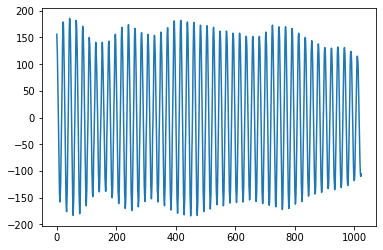

In [30]:
plt.close()
plt.plot(data)
plt.show()

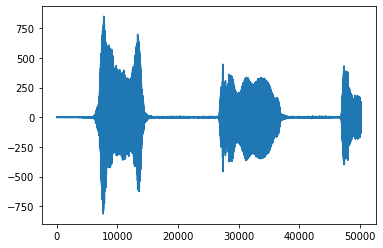

In [31]:
plt.close()
plt.plot(data2)
plt.show()

In [32]:
#to stop the recording after the amount of time we calculated in our code
stream.stop_stream() # stop stream(Recording)
stream.close() # close stream
p.terminate() # close PyAudio

In [33]:
#to play the recorded sound
p2 = pyaudio.PyAudio() # instantiate PyAudio
out = p2.open(format=pyaudio.paInt16,channels=1, rate=10000, output=True, frames_per_buffer=chunck)

In [34]:
data_out = np.chararray.tostring(data2.astype(np.int16)) # convert data to string(needed for playing sound in order to turn the data to sound)

<ipython-input-34-90c6e4e4c0f8>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  data_out = np.chararray.tostring(data2.astype(np.int16)) # convert data to string(needed for playing sound in order to turn the data to sound)


In [35]:
# play. May repeat with different volume values (if done interactively)
out.write(data_out)

In [14]:
#deleting the first of our sound till 15000
data2 = data2[15000:]

data_out = np.chararray.tostring(data2.astype(np.int16))
out.write(data_out)

<ipython-input-14-d7346bd5461d>:4: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  data_out = np.chararray.tostring(data2.astype(np.int16))


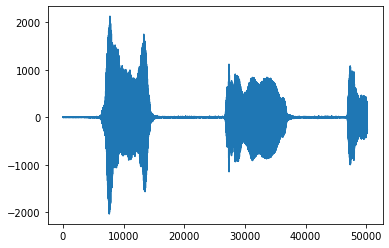

In [36]:
data2 = data2*2.5 # increase the volume of the sound
plt.close()
plt.plot(data2)
plt.show()

In [37]:
# to play the sound after increasing the volume
data_out = np.chararray.tostring(data2.astype(np.int16))
out.write(data_out)

<ipython-input-37-95c406541b1d>:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  data_out = np.chararray.tostring(data2.astype(np.int16))


In [62]:
#to save the sound
wf = wave.open("sound.wav", 'wb') # open a wave file
wf.setnchannels(1) # set the number of channels
wf.setsampwidth(p.get_sample_size(pyaudio.paInt16)) # set the sample width
wf.setframerate(10000) # set the frame rate
wf.writeframes(data_out) # write the frames
wf.close() # close the wave file

In [38]:
data2.shape

(50176,)

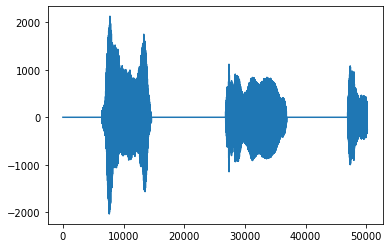

In [39]:
#to delete the noise in the recording(the one who are under 100 frequences)
"""for i in data2:
    if i < 100:
        i = 0"""

for i in range(len(data2)): 
    if data2[i] < 100 and data2[i] > -100:
        data2[i] = 0

plt.close()
plt.plot(data2)
plt.show()

C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\matplotlib\axes\_axes.py:7774: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


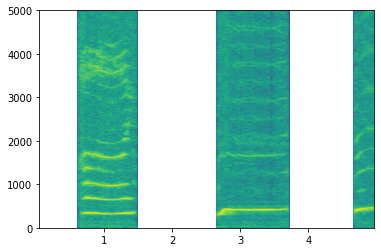

In [40]:
#showing the spectrum of the sound
plt.close()
plt.specgram(data2, NFFT=1024, Fs=10000, noverlap=900) #nfft is the number of data points used in each block for the FFT and Fs is the sampling frequency of the data and noverlap is the number of points of overlap between blocks
plt.show()

C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


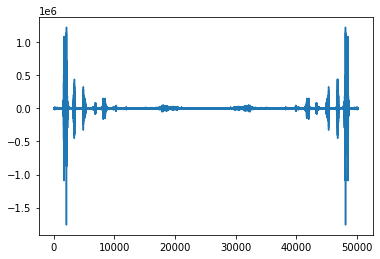

In [44]:
#fourier series
out_fft = np.fft.fft(data2)
plt.close()
plt.plot(out_fft)
plt.show()

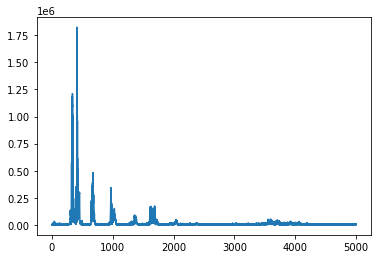

In [46]:
#formual for showing the frequencies
tpCount = len(data2)

values = np.arange(int(tpCount/2))

timePeriod = tpCount/10000

frequency = values/timePeriod


#showing the frequency
plt.close()
plt.plot(frequency, abs(out_fft[:int(tpCount/2)]))
plt.show()